# Example from Cohen, Cohen, West, Aiken 2003. 

**Background, from Cohen et al. 2003**: We assume that the data have been collected
from intact women's groups that have a focus on diet and weight control; the
groups meet regularly to discuss diet and weight control, and have some level of
cohesion. We may thus expect some correlation among the women within a group `j`
in both their *motivation to lose weight* and *weight loss success*. 

There are a **total of 386 women** in all distributed across the **40 groups**. Group
size ranges from 5 to 15 women. There is **substantial clustering in the data**,
reflected in the fact that the groups differe substantially in mean pounds of
weight lost, from a low mean of 9.75 points lost to a high mean of 24.43 pounds
lost. 

In [1]:
import tisane as ts

import pandas as pd
import numpy as np
import os

## Load the data

In [2]:
df = pd.read_csv("exercise_group_age_added.csv")

## Create observed variables

In [3]:
# 386 adults
adult = ts.Unit("member", cardinality=386)  

# Each adult has a value for motivation, which is ordinal
motivation_level = adult.ordinal("motivation",
                                 order=[1, 2, 3, 4, 5, 6])
pounds_lost = adult.numeric("pounds_lost")

age = adult.numeric("age", number_of_instances=1)

# 40 groups
group = ts.Unit("group", cardinality=40)


Each group has one of two approaches to weight loss they promote

_Note: By default, `number_of_instances` is `1`. The parameter value is explicitly set below for clarity._

The cardinality of `treatment_approach` is `2` because there are two approaches to weight loss in this study design:

1. Control
2. Treatment

In [4]:
treatment_approach = group.nominal("treatment",
                                   cardinality=2,
                                   number_of_instances=1)

### Now, we add conceptual and data measurement relationships

One of the research questions behind the study was to see if there's any difference between the two treatments in the effect on weight loss. Therefore, we add a `causes` relationship, so that the treatment _causes_ weight loss.

Recall that we suspect that `motivation_level` is **associated with** weight loss, `pounds_lost`. We can do this using the `associates_with` method. Similarly, we think that `age` might also be correlated with `motivation_level` as well as with `pounds_lost`.

Additionally, it seems like it's possible that both `age` and `motivation_level` interact and have some relationship with `pounds_lost`. This interaction can be expressed using the `moderates` method.

We also want to express that the participants in the study are organized as a part of groups. We can do this using the `nests_within` method.

In [5]:
# Conceptual relationships between the observed variables
treatment_approach.causes(pounds_lost)
motivation_level.associates_with(pounds_lost)

age.associates_with(motivation_level)
age.associates_with(pounds_lost)
age.moderates(motivation_level, on=pounds_lost)

# Data measurement relationships
# Declare nesting relationship
adult.nests_within(group)  # Members are part of groups

### Put the study design together


In [6]:
design = (ts
          .Design(dv=pounds_lost, ivs=[treatment_approach, motivation_level])
          .assign_data(df))

adding relationship <class 'tisane.variable.Has'>
Adding
adding relationship <class 'tisane.variable.Causes'>
Adding
adding relationship <class 'tisane.variable.Associates'>
Adding
adding relationship <class 'tisane.variable.Associates'>
Adding
adding relationship <class 'tisane.variable.Moderates'>
Adding
adding relationship <class 'tisane.variable.Has'>
Adding
adding relationship <class 'tisane.variable.Causes'>
Adding
adding relationship <class 'tisane.variable.Has'>
Adding
adding relationship <class 'tisane.variable.Associates'>
Adding
adding relationship <class 'tisane.variable.Associates'>
Adding
adding relationship <class 'tisane.variable.Moderates'>
Adding
adding relationship <class 'tisane.variable.Nests'>
Adding
adding relationship <class 'tisane.variable.Nests'>
Adding


## Query Tisane to infer a statistical model

This launches a GUI in the cell's output that will generate a script called `model.py`

In [7]:
ts.infer_statistical_model_from_design(design=design, jupyter=True)

## After generating code on the fourth tab of the GUI

There should be a file called `model.py` in this folder! You can import it:

In [10]:
import model

Note that if you re-generate the model in the GUI, you will need to restart the Jupyter kernel.

## Fitting the model

The function `model.fit_model` returns the fitted model, and also outputs the result of the model fit.

In [11]:
m = model.fit_model()

Formula: pounds_lost~age+motivation+treatment+age*motivation+(1|group)

Family: gaussian	 Inference: parametric

Number of observations: 386	 Groups: {'group': 40.0}

Log-likelihood: -952.728 	 AIC: 1905.456

Random effects:

                 Name    Var    Std
group     (Intercept)  2.199  1.483
Residual               6.817  2.611

No random effect correlations specified

Fixed effects:

                Estimate  2.5_ci  97.5_ci     SE       DF  T-stat  P-val  Sig
(Intercept)        3.637   0.793    6.482  1.451  379.401   2.506  0.013    *
age               -0.011  -0.058    0.035  0.024  357.609  -0.482  0.630     
motivation         3.147   2.394    3.899  0.384  360.672   8.195  0.000  ***
treatment          1.679   0.589    2.769  0.556   35.078   3.020  0.005   **
age:motivation     0.001  -0.012    0.014  0.007  356.178   0.143  0.886     


## Show a residual plot

To show a residual plot, use the function `model.show_model_diagnostics(m)`

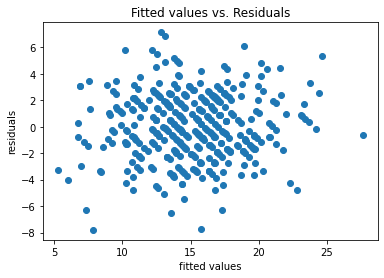

In [12]:
model.show_model_diagnostics(m)